In [1]:
import pandas as pd

## 데이터 불러오기

In [2]:
df=pd.read_csv('titanic_processed.csv')

In [3]:
df

,age,sibsp,parch,fare,pclass_1.0,pclass_2.0,pclass_3.0,sex_female,embarked_C,embarked_Q,embarked_S,survived
0,29.0000,0.0,0.0,211.3375,1,0,0,1,0,0,1,1
1,0.9167,1.0,2.0,151.5500,1,0,0,0,0,0,1,1
2,2.0000,1.0,2.0,151.5500,1,0,0,1,0,0,1,0
3,30.0000,1.0,2.0,151.5500,1,0,0,0,0,0,1,0
4,25.0000,1.0,2.0,151.5500,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,45.5000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0
1039,14.5000,1.0,0.0,14.4542,0,0,1,1,1,0,0,0
1040,26.5000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0
1041,27.0000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0


In [4]:
X=df[df.columns[:-1]]
y=df['survived']

## K-fold 검증

In [5]:
from sklearn.model_selection import KFold
kfold = KFold(5)

In [6]:
## 어떻게 작동하는지 이해하자
for i in kfold.split(X):
    print(i)

(array([ 209,  210,  211,  212,  213,  214,  215,  216,  217,  218,  219,
        220,  221,  222,  223,  224,  225,  226,  227,  228,  229,  230,
        231,  232,  233,  234,  235,  236,  237,  238,  239,  240,  241,
        242,  243,  244,  245,  246,  247,  248,  249,  250,  251,  252,
        253,  254,  255,  256,  257,  258,  259,  260,  261,  262,  263,
        264,  265,  266,  267,  268,  269,  270,  271,  272,  273,  274,
        275,  276,  277,  278,  279,  280,  281,  282,  283,  284,  285,
        286,  287,  288,  289,  290,  291,  292,  293,  294,  295,  296,
        297,  298,  299,  300,  301,  302,  303,  304,  305,  306,  307,
        308,  309,  310,  311,  312,  313,  314,  315,  316,  317,  318,
        319,  320,  321,  322,  323,  324,  325,  326,  327,  328,  329,
        330,  331,  332,  333,  334,  335,  336,  337,  338,  339,  340,
        341,  342,  343,  344,  345,  346,  347,  348,  349,  350,  351,
        352,  353,  354,  355,  356,  357,  358,  

## K-fold를 이용한 교차검증

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [8]:
kfold = KFold(5, shuffle=True)
reg = LogisticRegression()

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result=cross_validate(estimator=reg,X=X,y=y,cv=kfold,scoring=['accuracy','roc_auc'],return_train_score=True )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## 검증결과

In [10]:
result

{'fit_time': array([0.02634478, 0.02390265, 0.02453947, 0.02602434, 0.02603483]),
 'score_time': array([0.00647879, 0.00471926, 0.0045433 , 0.0048964 , 0.0048883 ]),
 'test_accuracy': array([0.81339713, 0.76076555, 0.77033493, 0.79807692, 0.78846154]),
 'train_accuracy': array([0.79136691, 0.80095923, 0.79976019, 0.79281437, 0.78802395]),
 'test_roc_auc': array([0.86290323, 0.83683473, 0.83536697, 0.81568971, 0.89782087]),
 'train_roc_auc': array([0.84692189, 0.85353692, 0.85547227, 0.85764399, 0.84130386])}

In [11]:
import matplotlib.pyplot as plt

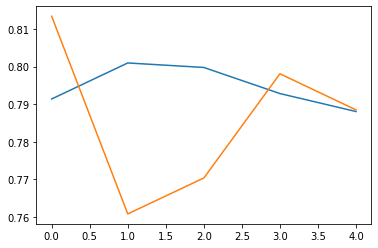

In [12]:
plt.plot(result['train_accuracy'])
plt.plot(result['test_accuracy'])

In [13]:
# 훈련 정확도 평균
result['train_accuracy'].mean()

0.794584930857709

In [14]:
# 테스트 정확도 평균
result['test_accuracy'].mean()

0.7862072138387928